<a href="https://colab.research.google.com/github/Ahtesham519/jupyter-notebook_python/blob/main/Natural_language_Processing_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import HTML  , display
import tabulate 
def pp(a, show_head = True ):
  if a.ndim < 2:
    a= [a]
  if show_head :
    display(HTML(tabulate.tabulate(a[:5] , tablefmt = 'html')))
    return
  display(HTML(tabulate.tabulate(a, tablefmt = 'html')))

In [14]:
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

In [15]:
documents = [
    "machine learning is such an amazing field",
    "i enjoy wiritng machine learning programs",
    "i think of tests as learning instruments"
]

Bag of words

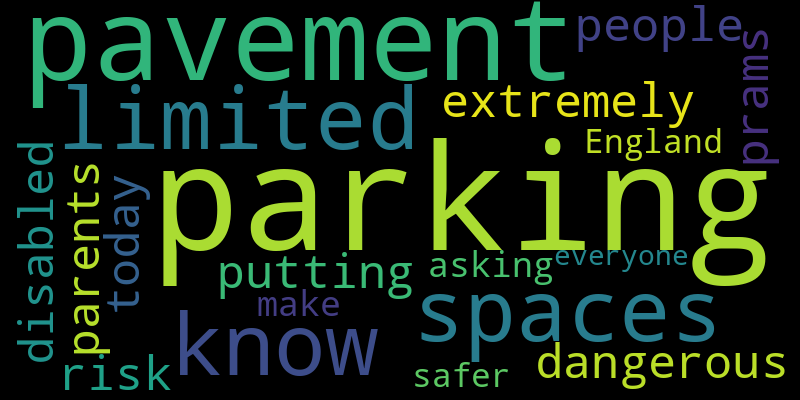

In [16]:
tweet = "I know parking spaces can be limited , but pavement parking can be extremely dangerous , putting disabled people and parents with prams at risk , So today we're asking how we can make England's pavements safer for everyone"
from wordcloud import WordCloud
wc = WordCloud(width = 800 , height = 400).generate(tweet)
wc.to_image()


In [17]:
documents

['machine learning is such an amazing field',
 'i enjoy wiritng machine learning programs',
 'i think of tests as learning instruments']

In [18]:
document_words = [doc.split() for doc in documents]

In [19]:
vocab = sorted(set(sum(document_words , [])))
print(vocab , "\n")

['amazing', 'an', 'as', 'enjoy', 'field', 'i', 'instruments', 'is', 'learning', 'machine', 'of', 'programs', 'such', 'tests', 'think', 'wiritng'] 



In [20]:
vocab_dict = {k:1 for i, k in enumerate(vocab)}   #word-index mapping , Used next in TF matrix
print(vocab_dict , "\n")

{'amazing': 1, 'an': 1, 'as': 1, 'enjoy': 1, 'field': 1, 'i': 1, 'instruments': 1, 'is': 1, 'learning': 1, 'machine': 1, 'of': 1, 'programs': 1, 'such': 1, 'tests': 1, 'think': 1, 'wiritng': 1} 



In [21]:
TF = np.zeros((len(documents) , len(vocab)) , dtype =int)
for i,doc in enumerate(document_words):
  for word in doc:
    TF[i , vocab_dict[word]] += 1
print('shape of TF matrix' , TF.shape)

shape of TF matrix (3, 16)


TF in sklearn

In [22]:
vectorizer = CountVectorizer()

TF_sklearn = vectorizer.fit_transform(documents, )
print(TF_sklearn.shape)   #(3,25) but it should be (3,27)
pp(TF_sklearn.toarray())

(3, 15)


1,1,0,0,1,0,1,1,1,0,0,1,0,0,0
0,0,0,1,0,0,0,1,1,0,1,0,0,0,1
0,0,1,0,0,1,0,1,0,1,0,0,1,1,0


In [23]:
TF_sklearn.shape == TF.shape


False

In [28]:
print((vectorizer.get_feature_names_out()))

['amazing' 'an' 'as' 'enjoy' 'field' 'instruments' 'is' 'learning'
 'machine' 'of' 'programs' 'such' 'tests' 'think' 'wiritng']


Pass this taken pattern(regex) to make sklearn behaviour similar to ours.

In [29]:
vectorizer_includes_single_char = CountVectorizer(token_pattern= u"(?u)\\b\\w+\\b")
TF_sklearn_includes_single_char = vectorizer_includes_single_char.fit_transform(documents, )
print(TF_sklearn_includes_single_char.shape)
pp(TF_sklearn_includes_single_char.toarray())

(3, 16)


1,1,0,0,1,0,0,1,1,1,0,0,1,0,0,0
0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1
0,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0


In [30]:
TF_sklearn_includes_single_char.shape == TF.shape

True

IDF(Inverse Document Frequency)

In [31]:
count_docs_with_word_j = TF.astype(bool).sum(axis=0)

In [32]:
total_docs = TF.shape[0]
IDF = np.log(total_docs / count_docs_with_word_j)
pp(IDF)

<ipython-input-32-5d270a11cb7e>:2: RuntimeWarning: divide by zero encountered in true_divide
  IDF = np.log(total_docs / count_docs_with_word_j)


inf,0,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


In [33]:
idx_arr = np.where(IDF == 0)  #
idx = int(idx_arr[0][0])
vocab[idx]

'an'

TFIDF

In [34]:
TFIDF = TF * IDF
print(TFIDF.shape)
pp(TFIDF)


(3, 16)


<ipython-input-34-8be4eccd085c>:1: RuntimeWarning: invalid value encountered in multiply
  TFIDF = TF * IDF


nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [36]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_sklearn = tfidf_vectorizer.fit_transform(documents)
tfidf_sklearn

<3x15 sparse matrix of type '<class 'numpy.float64'>'
	with 18 stored elements in Compressed Sparse Row format>

In [37]:
pp(tfidf_sklearn.toarray())

0.410747,0.410747,0,0,0.410747,0,0.410747,0.242594,0.312384,0,0,0.410747,0,0,0
0,0,0,0.504611,0,0,0,0.298032,0.38377,0,0.504611,0,0,0,0.504611
0,0,0.432385,0,0,0.432385,0,0.255374,0,0.432385,0,0,0.432385,0.432385,0


Text classification Using TFIDF Features

In [38]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset = 'train')

In [39]:
n_samples = 1000
#tf_news = vectorinzert.fit_transform(newsgroups_train.data)
raw_text = newsgroups_train.data[:n_samples]
tfidf_feats = tfidf_vectorizer.fit_transform(raw_text)
labels = newsgroups_train.target[:n_samples]

In [40]:
from sklearn.svm import SVC
svc_clf = SVC()

In [41]:
tfidf_feats

<1000x32190 sparse matrix of type '<class 'numpy.float64'>'
	with 157775 stored elements in Compressed Sparse Row format>

In [42]:
train_size = int(n_samples * .8)      #80% data for trading
x_train = tfidf_feats[:train_size]
y_train = labels[:train_size]
svc_clf.fit(tfidf_feats, labels)

SVC()

In [43]:
x_test = tfidf_feats[train_size:]
y_test = labels[train_size:]

svc_clf.score(x_test , y_test)

0.995

After the DL

In [44]:
documents = [
    "king will reward drawf",
    "queen is angry",
    "apple is worth more than 2 trillion dollars now"
]

In [49]:
import gensim as gs
import numpy as np
word2vec_model = gs.models.KeyedVectors.load_word2vec_format(
    'supplementary_notebooks/data/deps.words.bin' , binary= True
)

FileNotFoundError: ignored

In [50]:
word2vec_model["king"][:5] 

NameError: ignored